In [18]:
import cv2
import matplotlib.pyplot as plt

In [19]:
image = cv2.imread('lionvtiger', 1)
original_image = image.copy()      
plt.imshow(image)          

AttributeError: ignored

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

error: ignored

In [8]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')  

error: ignored

In [ ]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

cat


In [ ]:
layer_names = net.getLayerNames()

output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
layer_names = net.getLayerNames()

In [ ]:
layer_names

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [ ]:
output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
height, width,_ = gray_image.shape

In [ ]:
blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)

In [ ]:
net.setInput(blob)
outs = net.forward(output_layer)

In [ ]:
len(outs)

3

[16]
[0.8748912811279297]
[[13, 10, 359, 273]]
[16, 15]
[0.8748912811279297, 0.9928683042526245]
[[13, 10, 359, 273], [270, 58, 188, 249]]


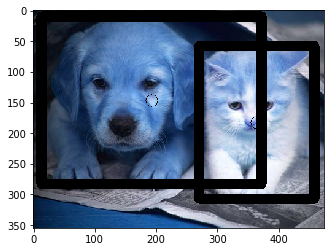

In [ ]:
import numpy as np

class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        
        confidence = scores[class_id]
#         print(confidence)
        if confidence > 0.6:
            cx = int(det[0] * width)
            cy = int(det[1] * height)
            
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x, y = int(cx - w / 2), int(cy - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 4)
            
plt.imshow(image)

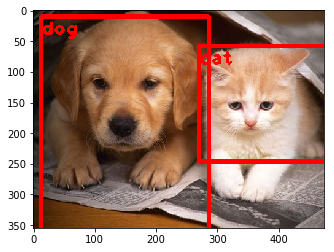

In [ ]:
n_det = len(boxes)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(gray_image, (x, y), (x+h, y+w), (255, 0, 0), 5)
        cv2.putText(gray_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 3)

plt.imshow(gray_image)
